In [1]:
## importing required libraries
import pandas as pd 
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix , classification_report,mean_squared_error,mean_absolute_error
from sklearn.linear_model import Ridge,Lasso,RidgeCV,LassoCV
from sklearn.neighbors import KNeighborsClassifier,KNeighborsRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.feature_selection import SelectKBest,f_classif
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import KFold,cross_val_score
from sklearn.preprocessing import LabelEncoder
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, roc_auc_score 
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
df= pd.read_csv("C:\\Users\\adil2\\Downloads\\Data-Science-ML-Capstone-Projects-master\\Data-Science-ML-Capstone-Projects-master\\avocado.csv")
df.head()

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0.0,27-12-2015,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015.0,Albany
1,1.0,20-12-2015,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015.0,Albany
2,2.0,13-12-2015,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015.0,Albany
3,3.0,06-12-2015,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015.0,Albany
4,4.0,29-11-2015,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015.0,Albany


In [3]:
df.shape

(16468, 14)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16468 entries, 0 to 16467
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0    1517 non-null   float64
 1   Date          1517 non-null   object 
 2   AveragePrice  1517 non-null   float64
 3   Total Volume  1517 non-null   float64
 4   4046          1517 non-null   float64
 5   4225          1517 non-null   float64
 6   4770          1517 non-null   float64
 7   Total Bags    1517 non-null   float64
 8   Small Bags    1517 non-null   float64
 9   Large Bags    1517 non-null   float64
 10  XLarge Bags   1517 non-null   float64
 11  type          1517 non-null   object 
 12  year          1517 non-null   float64
 13  region        1517 non-null   object 
dtypes: float64(11), object(3)
memory usage: 1.8+ MB


In [5]:
df.describe()

,Unnamed: 0,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,year
count,1517.000000,1517.000000,1.517000e+03,1.517000e+03,1.517000e+03,1.517000e+03,1.517000e+03,1.517000e+03,1.517000e+03,1517.000000,1517.000000
mean,26.995386,1.074990,1.601879e+06,6.464387e+05,6.114375e+05,5.040550e+04,2.935974e+05,2.487736e+05,4.264205e+04,2181.771074,2015.162821
std,14.848287,0.188891,4.433143e+06,1.947614e+06,1.672906e+06,1.377812e+05,7.579765e+05,6.474765e+05,1.182157e+05,7455.712144,0.369324
min,0.000000,0.490000,3.875074e+04,4.677200e+02,1.783770e+03,0.000000e+00,3.311770e+03,3.311770e+03,0.000000e+00,0.000000,2015.000000
25%,14.000000,0.980000,1.474700e+05,2.040034e+04,4.147606e+04,9.112500e+02,3.620689e+04,2.972722e+04,5.407400e+02,0.000000,2015.000000
50%,29.000000,1.080000,4.027919e+05,8.175117e+04,1.186649e+05,7.688170e+03,7.397906e+04,6.237569e+04,5.044350e+03,0.000000,2015.000000
75%,39.000000,1.190000,9.819751e+05,3.775785e+05,4.851503e+05,2.916730e+04,1.576097e+05,1.461994e+05,2.926767e+04,401.480000,2015.000000
max,51.000000,1.680000,4.465546e+07,1.893304e+07,1.895648e+07,1.381516e+06,6.736304e+06,5.893642e+06,1.121076e+06,108072.790000,2016.000000


In [6]:
df = df.drop(columns = ['Unnamed: 0'])

In [7]:
df.isnull().sum()

Date            14951
AveragePrice    14951
Total Volume    14951
4046            14951
4225            14951
4770            14951
Total Bags      14951
Small Bags      14951
Large Bags      14951
XLarge Bags     14951
type            14951
year            14951
region          14951
dtype: int64

In [8]:
df = df.dropna(axis = 0,how = 'all')

In [9]:
df.shape

(1517, 13)

In [10]:
df.isnull().sum()

Date            0
AveragePrice    0
Total Volume    0
4046            0
4225            0
4770            0
Total Bags      0
Small Bags      0
Large Bags      0
XLarge Bags     0
type            0
year            0
region          0
dtype: int64

In [11]:
df.tail()

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
1512,16-10-2016,1.39,190846.01,57529.11,56366.66,17531.78,59418.46,48823.53,10354.65,240.28,conventional,2016.0,Charlotte
1513,09-10-2016,1.51,178235.75,43325.87,52189.61,19419.57,63300.70,54704.14,8596.56,0.00,conventional,2016.0,Charlotte
1514,02-10-2016,1.48,178410.82,46364.75,52893.38,16736.92,62415.77,53332.61,8258.16,825.00,conventional,2016.0,Charlotte
1515,25-09-2016,1.47,189131.52,54110.79,53593.58,17495.42,63931.73,55653.47,8278.26,0.00,conventional,2016.0,Charlotte
1516,18-09-2016,1.43,182978.30,43116.41,54193.42,16563.91,69104.56,57456.21,11648.35,0.00,conventional,2016.0,Charlotte


In [12]:
##Replacing the columns Names
df = df.rename(columns = {'4046' : 'PLU_4046','4225': 'PLU_4225','4770':'PLU_4770','Small Bags' :'Small_bags','Large Bags': 'Large_bags','Total Bags' : 'Total_bags','XLarge Bags': 'XLarge_bags','Total Volume':'Total_volume'})

In [13]:
df.describe()

,AveragePrice,Total_volume,PLU_4046,PLU_4225,PLU_4770,Total_bags,Small_bags,Large_bags,XLarge_bags,year
count,1517.000000,1.517000e+03,1.517000e+03,1.517000e+03,1.517000e+03,1.517000e+03,1.517000e+03,1.517000e+03,1517.000000,1517.000000
mean,1.074990,1.601879e+06,6.464387e+05,6.114375e+05,5.040550e+04,2.935974e+05,2.487736e+05,4.264205e+04,2181.771074,2015.162821
std,0.188891,4.433143e+06,1.947614e+06,1.672906e+06,1.377812e+05,7.579765e+05,6.474765e+05,1.182157e+05,7455.712144,0.369324
min,0.490000,3.875074e+04,4.677200e+02,1.783770e+03,0.000000e+00,3.311770e+03,3.311770e+03,0.000000e+00,0.000000,2015.000000
25%,0.980000,1.474700e+05,2.040034e+04,4.147606e+04,9.112500e+02,3.620689e+04,2.972722e+04,5.407400e+02,0.000000,2015.000000
50%,1.080000,4.027919e+05,8.175117e+04,1.186649e+05,7.688170e+03,7.397906e+04,6.237569e+04,5.044350e+03,0.000000,2015.000000
75%,1.190000,9.819751e+05,3.775785e+05,4.851503e+05,2.916730e+04,1.576097e+05,1.461994e+05,2.926767e+04,401.480000,2015.000000
max,1.680000,4.465546e+07,1.893304e+07,1.895648e+07,1.381516e+06,6.736304e+06,5.893642e+06,1.121076e+06,108072.790000,2016.000000


In [14]:
## Using LabelEncoder for transforming the string to numerical data
le = LabelEncoder()

In [15]:
df1 = le.fit_transform(df['type'])
pd.Series(df1)
df2 = le.fit_transform(df['region'])
pd.Series(df2)

0       0
1       0
2       0
3       0
4       0
       ..
1512    7
1513    7
1514    7
1515    7
1516    7
Length: 1517, dtype: int32

In [16]:
df['type'] = df1
df['region'] = df2

In [17]:
df

,Date,AveragePrice,Total_volume,PLU_4046,PLU_4225,PLU_4770,Total_bags,Small_bags,Large_bags,XLarge_bags,type,year,region
0,27-12-2015,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.00,0,2015.0,0
1,20-12-2015,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.00,0,2015.0,0
2,13-12-2015,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.00,0,2015.0,0
3,06-12-2015,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.00,0,2015.0,0
4,29-11-2015,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.00,0,2015.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1512,16-10-2016,1.39,190846.01,57529.11,56366.66,17531.78,59418.46,48823.53,10354.65,240.28,0,2016.0,7
1513,09-10-2016,1.51,178235.75,43325.87,52189.61,19419.57,63300.70,54704.14,8596.56,0.00,0,2016.0,7
1514,02-10-2016,1.48,178410.82,46364.75,52893.38,16736.92,62415.77,53332.61,8258.16,825.00,0,2016.0,7
1515,25-09-2016,1.47,189131.52,54110.79,53593.58,17495.42,63931.73,55653.47,8278.26,0.00,0,2016.0,7


In [18]:
df.describe()

,AveragePrice,Total_volume,PLU_4046,PLU_4225,PLU_4770,Total_bags,Small_bags,Large_bags,XLarge_bags,type,year,region
count,1517.000000,1.517000e+03,1.517000e+03,1.517000e+03,1.517000e+03,1.517000e+03,1.517000e+03,1.517000e+03,1517.000000,1517.0,1517.000000,1517.000000
mean,1.074990,1.601879e+06,6.464387e+05,6.114375e+05,5.040550e+04,2.935974e+05,2.487736e+05,4.264205e+04,2181.771074,0.0,2015.162821,21.196440
std,0.188891,4.433143e+06,1.947614e+06,1.672906e+06,1.377812e+05,7.579765e+05,6.474765e+05,1.182157e+05,7455.712144,0.0,0.369324,16.132398
min,0.490000,3.875074e+04,4.677200e+02,1.783770e+03,0.000000e+00,3.311770e+03,3.311770e+03,0.000000e+00,0.000000,0.0,2015.000000,0.000000
25%,0.980000,1.474700e+05,2.040034e+04,4.147606e+04,9.112500e+02,3.620689e+04,2.972722e+04,5.407400e+02,0.000000,0.0,2015.000000,6.000000
50%,1.080000,4.027919e+05,8.175117e+04,1.186649e+05,7.688170e+03,7.397906e+04,6.237569e+04,5.044350e+03,0.000000,0.0,2015.000000,19.000000
75%,1.190000,9.819751e+05,3.775785e+05,4.851503e+05,2.916730e+04,1.576097e+05,1.461994e+05,2.926767e+04,401.480000,0.0,2015.000000,35.000000
max,1.680000,4.465546e+07,1.893304e+07,1.895648e+07,1.381516e+06,6.736304e+06,5.893642e+06,1.121076e+06,108072.790000,0.0,2016.000000,50.000000


In [19]:
#checking the counts of xlargebags
df.XLarge_bags.value_counts()

0.00       798
1.63         2
2.85         2
37.50        2
240.28       2
          ... 
826.82       1
6342.66      1
6.31         1
1581.50      1
50.47        1
Name: XLarge_bags, Length: 711, dtype: int64

In [20]:
#removing the xlargebags column
df = df.drop(columns = ['XLarge_bags'])

In [21]:
## replacing zero's values with mean
df['PLU_4770'] = df['PLU_4770'].replace(0,df['PLU_4770'].mean())
df['Large_bags'] = df['Large_bags'].replace(0,df['Large_bags'].mean())
df['region'] = df['region'].replace(0,df['region'].mode()[0])

In [22]:
df.describe()

,AveragePrice,Total_volume,PLU_4046,PLU_4225,PLU_4770,Total_bags,Small_bags,Large_bags,type,year,region
count,1517.000000,1.517000e+03,1.517000e+03,1.517000e+03,1.517000e+03,1.517000e+03,1.517000e+03,1.517000e+03,1517.0,1517.000000,1517.000000
mean,1.074990,1.601879e+06,6.464387e+05,6.114375e+05,5.043872e+04,2.935974e+05,2.487736e+05,4.640872e+04,0.0,2015.162821,21.461437
std,0.188891,4.433143e+06,1.947614e+06,1.672906e+06,1.377752e+05,7.579765e+05,6.474765e+05,1.174735e+05,0.0,0.369324,15.828254
min,0.490000,3.875074e+04,4.677200e+02,1.783770e+03,2.650000e+00,3.311770e+03,3.311770e+03,1.840000e+00,0.0,2015.000000,1.000000
25%,0.980000,1.474700e+05,2.040034e+04,4.147606e+04,9.295700e+02,3.620689e+04,2.972722e+04,1.549290e+03,0.0,2015.000000,6.000000
50%,1.080000,4.027919e+05,8.175117e+04,1.186649e+05,7.750340e+03,7.397906e+04,6.237569e+04,9.791400e+03,0.0,2015.000000,19.000000
75%,1.190000,9.819751e+05,3.775785e+05,4.851503e+05,2.958390e+04,1.576097e+05,1.461994e+05,4.264205e+04,0.0,2015.000000,35.000000
max,1.680000,4.465546e+07,1.893304e+07,1.895648e+07,1.381516e+06,6.736304e+06,5.893642e+06,1.121076e+06,0.0,2016.000000,50.000000


In [23]:
## adding another column season for better understanding in which season it sales 
df['Date'] = pd.to_datetime(df['Date'])

In [24]:
def season_of_date(date):
    year = str(date.year)
    seasons = {'spring' : pd.date_range(start = '21/03/'+year,end = '20/06/'+year),
               'summer' : pd.date_range(start = '21/06/'+year,end = '22/09/'+year),
               'autumn' : pd.date_range(start = '23/09/'+year,end = '20/12/'+year)}
    if date in seasons['spring']:
        return 'spring'
    if date in seasons['summer']:
        return 'summer'
    if date in seasons['autumn']:
        return 'autumn'
    else:
        return 'winter'

In [25]:
df['season'] =df.Date.map(season_of_date)

In [26]:
df.head()

,Date,AveragePrice,Total_volume,PLU_4046,PLU_4225,PLU_4770,Total_bags,Small_bags,Large_bags,type,year,region,season
0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0,2015.0,6,winter
1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0,2015.0,6,autumn
2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0,2015.0,6,autumn
3,2015-06-12,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0,2015.0,6,spring
4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0,2015.0,6,autumn


In [27]:
## removing the date columns we added another column season then there is no use of date
df = df.drop(columns = ['Date'])

In [28]:
##  As the season is string need to convert into numerical data
df3 = le.fit_transform(df['season'])
pd.Series(df3)

df['season'] = df3

In [29]:
df.head()

,AveragePrice,Total_volume,PLU_4046,PLU_4225,PLU_4770,Total_bags,Small_bags,Large_bags,type,year,region,season
0,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0,2015.0,6,3
1,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0,2015.0,6,0
2,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0,2015.0,6,0
3,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0,2015.0,6,1
4,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0,2015.0,6,0


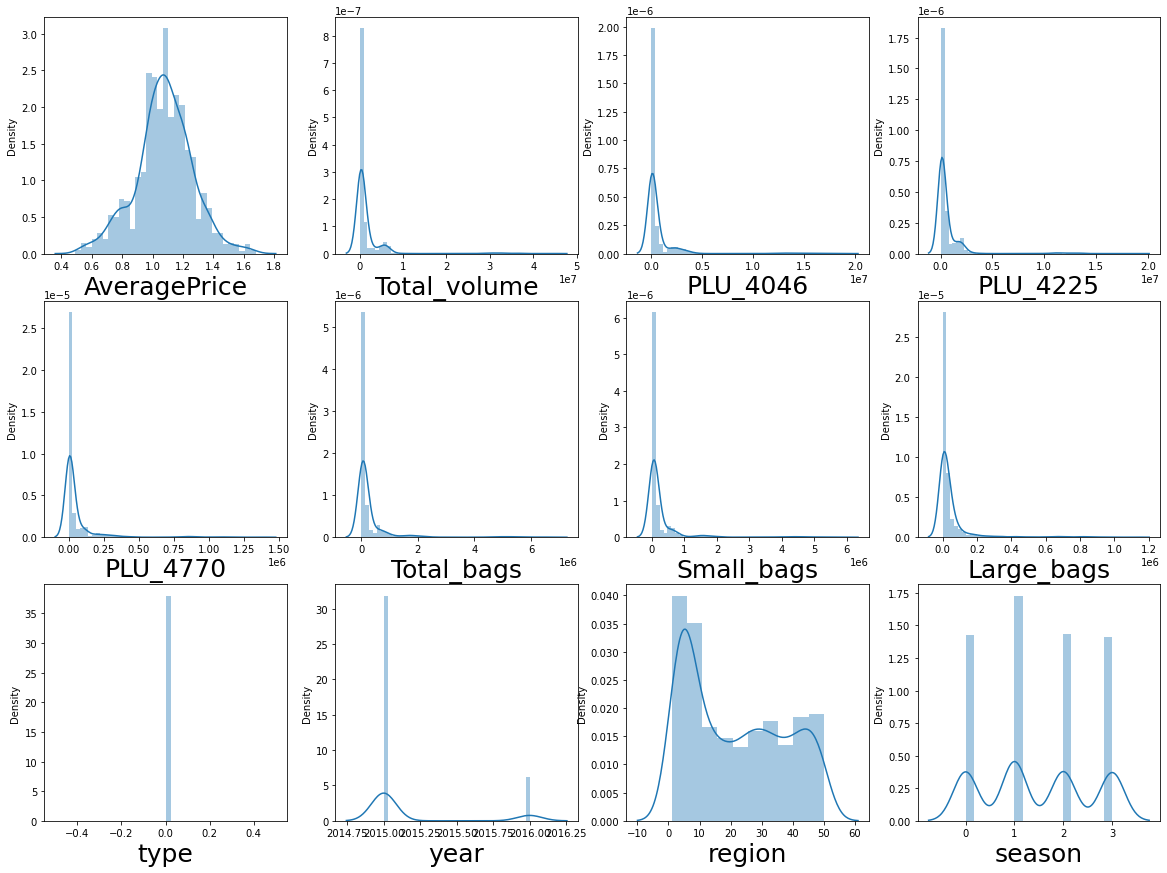

In [30]:
## distribution plot to check the data distribition
plt.figure(figsize = (20,20))
plt_num =1

for column in df:
    if plt_num<=12:
        sx = plt.subplot(4,4,plt_num)
        sns.distplot(df[column])
        plt.xlabel(column,fontsize = 25)
    plt_num+=1
plt.show()

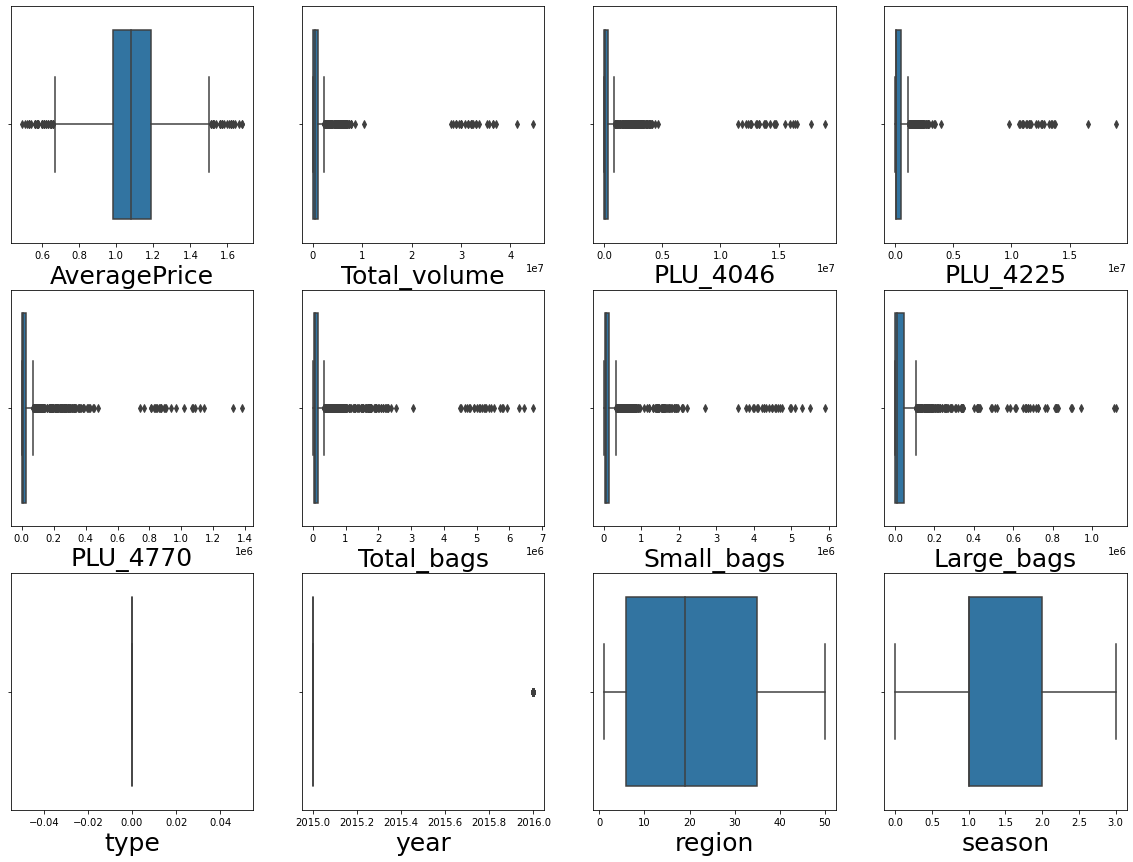

In [31]:
## plotting box plot to check the skewness and outliers in the data set
plt.figure(figsize = (20,20))
plt_num =1

for column in df:
    if plt_num<=12:
        sx = plt.subplot(4,4,plt_num)
        sns.boxplot(df[column])
        plt.xlabel(column,fontsize = 25)
    plt_num+=1
plt.show()

In [32]:
##finding the outliers 
q1 = df.quantile(0.25)
q3 = df.quantile(0.75)
iqr = q3- q1

In [33]:
iqr

AveragePrice         0.210000
Total_volume    834505.090000
PLU_4046        357178.140000
PLU_4225        443674.280000
PLU_4770         28654.330000
Total_bags      121402.790000
Small_bags      116472.130000
Large_bags       41092.759374
type                 0.000000
year                 0.000000
region              29.000000
season               1.000000
dtype: float64

In [34]:
# Removing outliers in the total_volume columns
total_volume = (q3.Total_volume + (1.5 * iqr.Total_volume))
total_volume

index = np.where(df['Total_volume']>total_volume)
index

df = df.drop(df.index[index])
df.shape

df.reset_index()

,index,AveragePrice,Total_volume,PLU_4046,PLU_4225,PLU_4770,Total_bags,Small_bags,Large_bags,type,year,region,season
0,0,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0,2015.0,6,3
1,1,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0,2015.0,6,0
2,2,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0,2015.0,6,0
3,3,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0,2015.0,6,1
4,4,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0,2015.0,6,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1282,1512,1.39,190846.01,57529.11,56366.66,17531.78,59418.46,48823.53,10354.65,0,2016.0,7,0
1283,1513,1.51,178235.75,43325.87,52189.61,19419.57,63300.70,54704.14,8596.56,0,2016.0,7,2
1284,1514,1.48,178410.82,46364.75,52893.38,16736.92,62415.77,53332.61,8258.16,0,2016.0,7,3
1285,1515,1.47,189131.52,54110.79,53593.58,17495.42,63931.73,55653.47,8278.26,0,2016.0,7,0


In [35]:
# Removing outliers in the PLU_4046 columns
plu = (q3.PLU_4046 + (1.5 * iqr.PLU_4046))
plu

index = np.where(df['PLU_4046']>plu)
index

df = df.drop(df.index[index])
df.shape

df.reset_index()

,index,AveragePrice,Total_volume,PLU_4046,PLU_4225,PLU_4770,Total_bags,Small_bags,Large_bags,type,year,region,season
0,0,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0,2015.0,6,3
1,1,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0,2015.0,6,0
2,2,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0,2015.0,6,0
3,3,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0,2015.0,6,1
4,4,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0,2015.0,6,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1261,1512,1.39,190846.01,57529.11,56366.66,17531.78,59418.46,48823.53,10354.65,0,2016.0,7,0
1262,1513,1.51,178235.75,43325.87,52189.61,19419.57,63300.70,54704.14,8596.56,0,2016.0,7,2
1263,1514,1.48,178410.82,46364.75,52893.38,16736.92,62415.77,53332.61,8258.16,0,2016.0,7,3
1264,1515,1.47,189131.52,54110.79,53593.58,17495.42,63931.73,55653.47,8278.26,0,2016.0,7,0


In [36]:
# Removing outliers in the PLU_4225 columns
plu_2 = (q3.PLU_4225 + (1.5 * iqr.PLU_4225))
plu_2

index = np.where(df['PLU_4225']>plu_2)
index

df = df.drop(df.index[index])
df.shape

df.reset_index()

,index,AveragePrice,Total_volume,PLU_4046,PLU_4225,PLU_4770,Total_bags,Small_bags,Large_bags,type,year,region,season
0,0,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0,2015.0,6,3
1,1,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0,2015.0,6,0
2,2,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0,2015.0,6,0
3,3,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0,2015.0,6,1
4,4,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0,2015.0,6,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1248,1512,1.39,190846.01,57529.11,56366.66,17531.78,59418.46,48823.53,10354.65,0,2016.0,7,0
1249,1513,1.51,178235.75,43325.87,52189.61,19419.57,63300.70,54704.14,8596.56,0,2016.0,7,2
1250,1514,1.48,178410.82,46364.75,52893.38,16736.92,62415.77,53332.61,8258.16,0,2016.0,7,3
1251,1515,1.47,189131.52,54110.79,53593.58,17495.42,63931.73,55653.47,8278.26,0,2016.0,7,0


In [37]:
# Removing outliers in the PLU_4770 columns
plu_3 = (q3.PLU_4770 + (1.5 * iqr.PLU_4770))
plu_3

index = np.where(df['PLU_4770']>plu_3)
index

df = df.drop(df.index[index])
df.shape

df.reset_index()

,index,AveragePrice,Total_volume,PLU_4046,PLU_4225,PLU_4770,Total_bags,Small_bags,Large_bags,type,year,region,season
0,0,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0,2015.0,6,3
1,1,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0,2015.0,6,0
2,2,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0,2015.0,6,0
3,3,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0,2015.0,6,1
4,4,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0,2015.0,6,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1190,1512,1.39,190846.01,57529.11,56366.66,17531.78,59418.46,48823.53,10354.65,0,2016.0,7,0
1191,1513,1.51,178235.75,43325.87,52189.61,19419.57,63300.70,54704.14,8596.56,0,2016.0,7,2
1192,1514,1.48,178410.82,46364.75,52893.38,16736.92,62415.77,53332.61,8258.16,0,2016.0,7,3
1193,1515,1.47,189131.52,54110.79,53593.58,17495.42,63931.73,55653.47,8278.26,0,2016.0,7,0


In [38]:
# Removing outliers in the Total_bags columns
total_bags = (q3.Total_bags + (1.5 * iqr.Total_bags))
total_bags

index = np.where(df['Total_bags']>total_bags)
index

df = df.drop(df.index[index])
df.shape

df.reset_index()

,index,AveragePrice,Total_volume,PLU_4046,PLU_4225,PLU_4770,Total_bags,Small_bags,Large_bags,type,year,region,season
0,0,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0,2015.0,6,3
1,1,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0,2015.0,6,0
2,2,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0,2015.0,6,0
3,3,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0,2015.0,6,1
4,4,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0,2015.0,6,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1179,1512,1.39,190846.01,57529.11,56366.66,17531.78,59418.46,48823.53,10354.65,0,2016.0,7,0
1180,1513,1.51,178235.75,43325.87,52189.61,19419.57,63300.70,54704.14,8596.56,0,2016.0,7,2
1181,1514,1.48,178410.82,46364.75,52893.38,16736.92,62415.77,53332.61,8258.16,0,2016.0,7,3
1182,1515,1.47,189131.52,54110.79,53593.58,17495.42,63931.73,55653.47,8278.26,0,2016.0,7,0


In [39]:
# Removing outliers in the Small_bags columns
small_bags = (q3.Small_bags + (1.5 * iqr.Small_bags))
small_bags

index = np.where(df['Small_bags']>small_bags)
index

df = df.drop(df.index[index])
df.shape

df.reset_index()

,index,AveragePrice,Total_volume,PLU_4046,PLU_4225,PLU_4770,Total_bags,Small_bags,Large_bags,type,year,region,season
0,0,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0,2015.0,6,3
1,1,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0,2015.0,6,0
2,2,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0,2015.0,6,0
3,3,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0,2015.0,6,1
4,4,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0,2015.0,6,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1179,1512,1.39,190846.01,57529.11,56366.66,17531.78,59418.46,48823.53,10354.65,0,2016.0,7,0
1180,1513,1.51,178235.75,43325.87,52189.61,19419.57,63300.70,54704.14,8596.56,0,2016.0,7,2
1181,1514,1.48,178410.82,46364.75,52893.38,16736.92,62415.77,53332.61,8258.16,0,2016.0,7,3
1182,1515,1.47,189131.52,54110.79,53593.58,17495.42,63931.73,55653.47,8278.26,0,2016.0,7,0


In [40]:
# Removing outliers in the Large_bags columns
large_bags = (q3.Large_bags + (1.5 * iqr.Large_bags))
large_bags

index = np.where(df['Large_bags']>large_bags)
index

df = df.drop(df.index[index])
df.shape

df.reset_index()

,index,AveragePrice,Total_volume,PLU_4046,PLU_4225,PLU_4770,Total_bags,Small_bags,Large_bags,type,year,region,season
0,0,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0,2015.0,6,3
1,1,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0,2015.0,6,0
2,2,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0,2015.0,6,0
3,3,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0,2015.0,6,1
4,4,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0,2015.0,6,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1173,1512,1.39,190846.01,57529.11,56366.66,17531.78,59418.46,48823.53,10354.65,0,2016.0,7,0
1174,1513,1.51,178235.75,43325.87,52189.61,19419.57,63300.70,54704.14,8596.56,0,2016.0,7,2
1175,1514,1.48,178410.82,46364.75,52893.38,16736.92,62415.77,53332.61,8258.16,0,2016.0,7,3
1176,1515,1.47,189131.52,54110.79,53593.58,17495.42,63931.73,55653.47,8278.26,0,2016.0,7,0


In [41]:
# Removing outliers in the region columns
reg = (q3.region + (1.5 * iqr.region))
reg

index = np.where(df['region']>reg)
index

df = df.drop(df.index[index])
df.shape

df.reset_index()

,index,AveragePrice,Total_volume,PLU_4046,PLU_4225,PLU_4770,Total_bags,Small_bags,Large_bags,type,year,region,season
0,0,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0,2015.0,6,3
1,1,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0,2015.0,6,0
2,2,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0,2015.0,6,0
3,3,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0,2015.0,6,1
4,4,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0,2015.0,6,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1173,1512,1.39,190846.01,57529.11,56366.66,17531.78,59418.46,48823.53,10354.65,0,2016.0,7,0
1174,1513,1.51,178235.75,43325.87,52189.61,19419.57,63300.70,54704.14,8596.56,0,2016.0,7,2
1175,1514,1.48,178410.82,46364.75,52893.38,16736.92,62415.77,53332.61,8258.16,0,2016.0,7,3
1176,1515,1.47,189131.52,54110.79,53593.58,17495.42,63931.73,55653.47,8278.26,0,2016.0,7,0


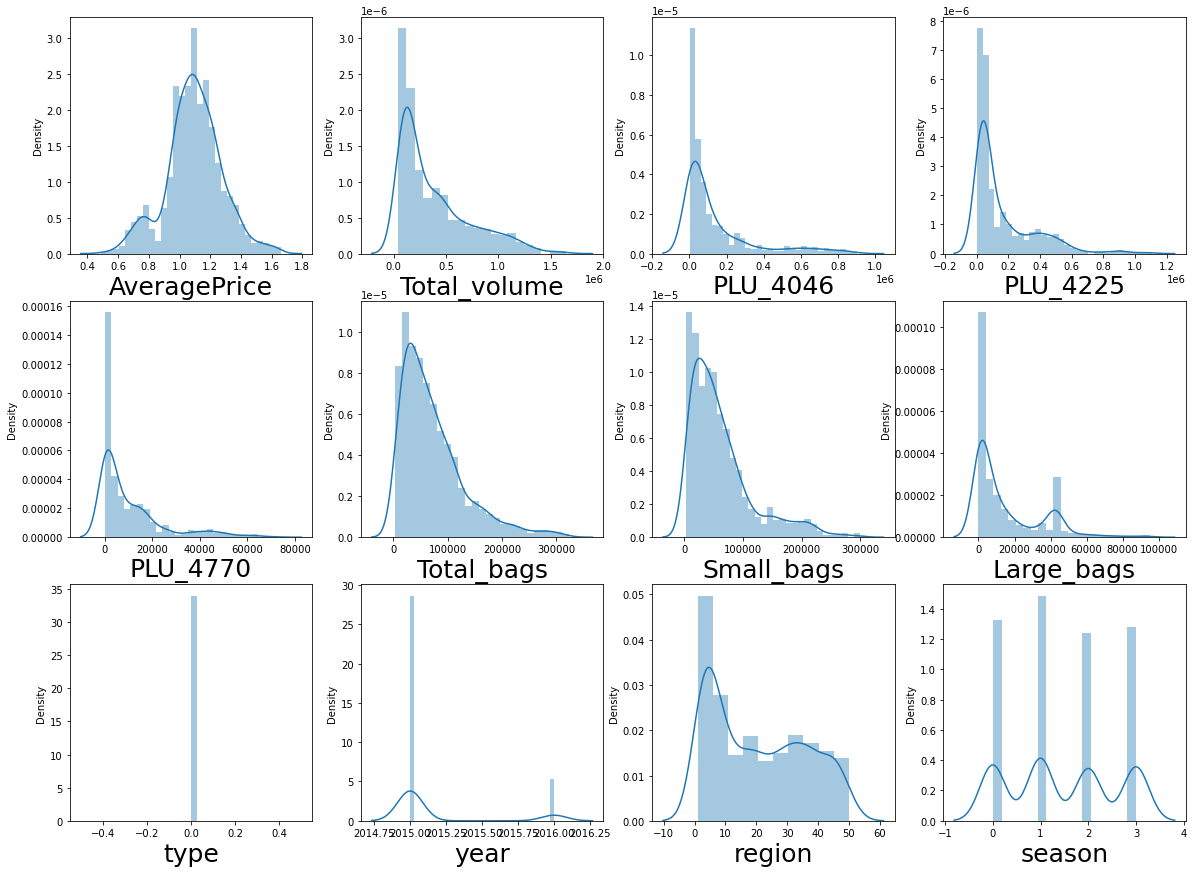

In [42]:
plt.figure(figsize = (20,20))
plt_num =1

for column in df:
    if plt_num<=12:
        sx = plt.subplot(4,4,plt_num)
        sns.distplot(df[column])
        plt.xlabel(column,fontsize = 25)
    plt_num+=1
plt.show()

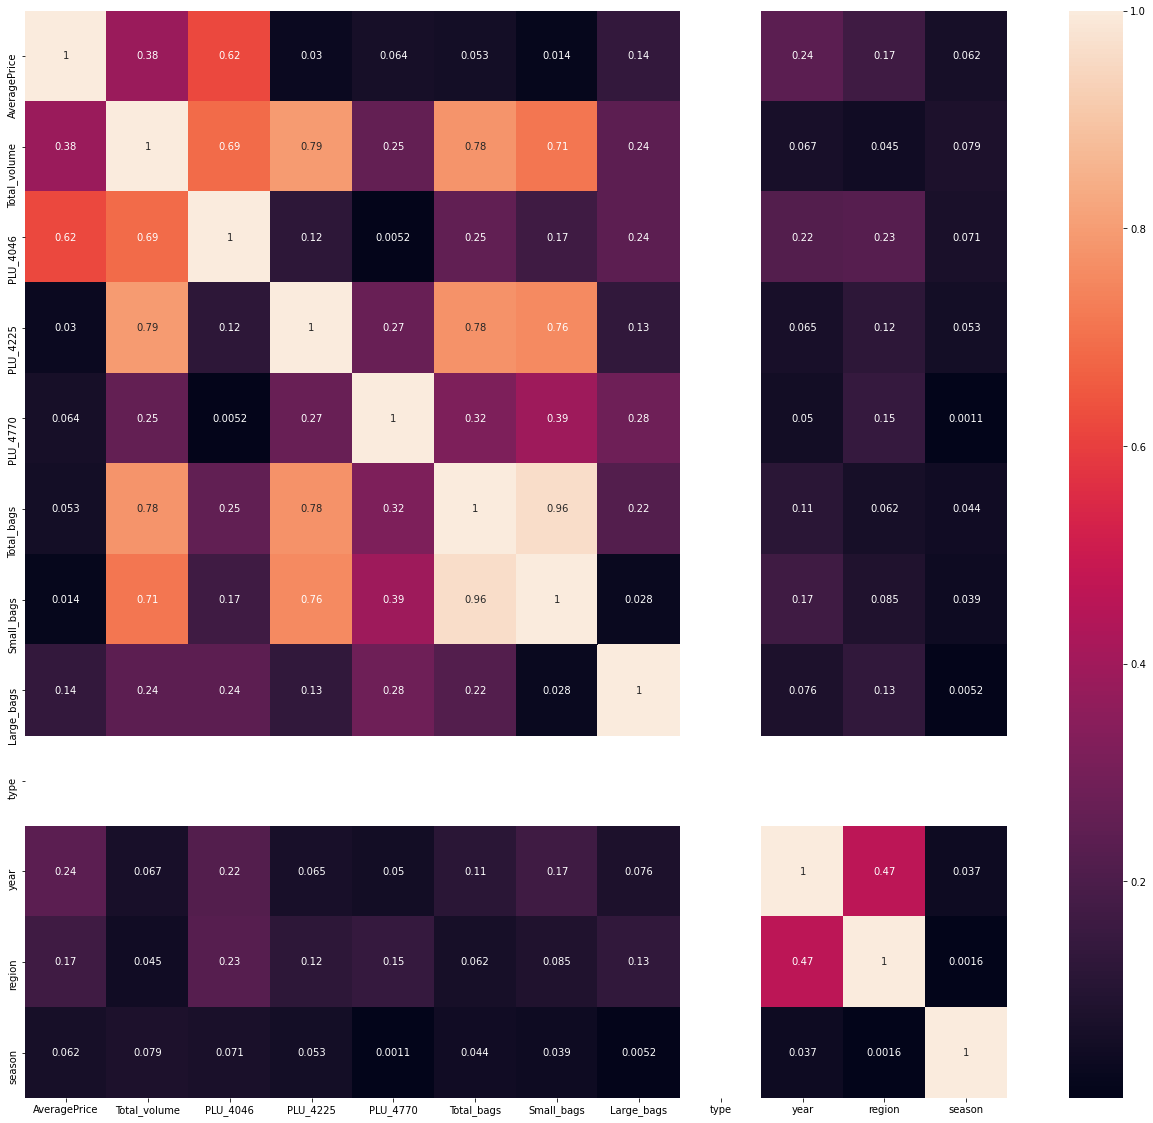

In [43]:
df_corr = df.corr().abs()
plt.figure(figsize = (22,20))
sns.heatmap(df_corr,annot = True,annot_kws = {'size':10})
plt.show()

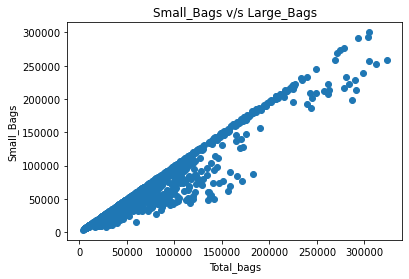

In [44]:
## plotting scatter plot to confirm co_relation between large_bags and small_bags
plt.scatter(df.Total_bags,df.Small_bags)
plt.xlabel('Total_bags')
plt.ylabel('Small_Bags')
plt.title('Small_Bags v/s Large_Bags')
plt.show()

In [45]:
## Rmoving small_bags column
df = df.drop(columns = ['Small_bags'])

In [46]:
df.head()

,AveragePrice,Total_volume,PLU_4046,PLU_4225,PLU_4770,Total_bags,Large_bags,type,year,region,season
0,1.33,64236.62,1036.74,54454.85,48.16,8696.87,93.25,0,2015.0,6,3
1,1.35,54876.98,674.28,44638.81,58.33,9505.56,97.49,0,2015.0,6,0
2,0.93,118220.22,794.70,109149.67,130.50,8145.35,103.14,0,2015.0,6,0
3,1.08,78992.15,1132.00,71976.41,72.58,5811.16,133.76,0,2015.0,6,1
4,1.28,51039.60,941.48,43838.39,75.78,6183.95,197.69,0,2015.0,6,0


In [47]:
#splitting the dataset
x = df.drop(columns = ['region'])
y = df['region']

In [48]:
x

,AveragePrice,Total_volume,PLU_4046,PLU_4225,PLU_4770,Total_bags,Large_bags,type,year,season
0,1.33,64236.62,1036.74,54454.85,48.16,8696.87,93.25,0,2015.0,3
1,1.35,54876.98,674.28,44638.81,58.33,9505.56,97.49,0,2015.0,0
2,0.93,118220.22,794.70,109149.67,130.50,8145.35,103.14,0,2015.0,0
3,1.08,78992.15,1132.00,71976.41,72.58,5811.16,133.76,0,2015.0,1
4,1.28,51039.60,941.48,43838.39,75.78,6183.95,197.69,0,2015.0,0
...,...,...,...,...,...,...,...,...,...,...
1512,1.39,190846.01,57529.11,56366.66,17531.78,59418.46,10354.65,0,2016.0,0
1513,1.51,178235.75,43325.87,52189.61,19419.57,63300.70,8596.56,0,2016.0,2
1514,1.48,178410.82,46364.75,52893.38,16736.92,62415.77,8258.16,0,2016.0,3
1515,1.47,189131.52,54110.79,53593.58,17495.42,63931.73,8278.26,0,2016.0,0


In [49]:
y

0       6
1       6
2       6
3       6
4       6
       ..
1512    7
1513    7
1514    7
1515    7
1516    7
Name: region, Length: 1178, dtype: int32

In [50]:
## Transforming the dataset in standard scaler form
sc = StandardScaler()
x_sc = sc.fit_transform(x)

In [51]:
x_train,x_test,y_train,y_test = train_test_split(x_sc,y,test_size = 0.25,random_state = 355)

In [52]:
#using KNeighbors classifier algorithm for this prolem statement for  classification problem
knn = KNeighborsClassifier()

In [53]:
knn.fit(x_train,y_train)

KNeighborsClassifier()

In [54]:
y_pred = knn.predict(x_test)
y_pred

array([11,  6, 13,  1, 44, 35, 47, 37, 46, 34, 29,  3,  6,  5, 36,  9, 29,
        9,  4, 22,  6,  3,  2, 41,  9,  1,  2, 17,  4,  6, 26, 44, 19,  2,
       10,  6,  4, 31, 22, 22, 44, 38, 12,  5,  1,  7, 11, 29, 46, 23, 47,
       33,  4,  5, 50, 34, 46, 47,  5, 34,  6,  1,  3, 26, 39, 10, 28, 44,
       46,  4, 50,  6, 15, 10, 34,  6, 47, 15, 44, 31,  4, 15, 31,  7,  4,
        4,  2, 44, 17, 50, 45, 44,  1,  3,  6,  4, 50,  1, 16,  9,  6,  6,
       44,  6,  1,  9, 13, 28, 19, 41, 17, 47,  9, 38, 25,  2,  6, 47, 50,
       30,  3,  9,  4, 44, 28,  4, 17, 28,  1,  7, 47,  1,  6,  4, 44, 26,
       31,  3, 32, 28, 38, 44, 31,  2, 17, 38, 20, 34,  6,  1, 33,  6, 25,
       11,  3, 11,  7, 44, 22,  2,  9,  2, 44, 50, 34, 26,  6, 47,  4,  4,
       23,  9, 22,  9,  5, 44, 44, 10, 47,  1,  3, 17, 22, 16, 25, 34,  1,
       34, 19, 50, 44,  4, 37,  5,  6, 30, 34, 44,  2,  3, 25, 10, 30, 38,
       19,  6, 38,  3,  5, 50, 38, 25, 26,  2, 37,  3, 11, 39,  3, 29,  6,
       19,  6,  5, 28, 15

In [55]:
#confusion_matrix
cfm = confusion_matrix(y_test,y_pred)
cfm

array([[13,  0,  0, ...,  0,  2,  0],
       [ 0, 12,  0, ...,  0,  0,  0],
       [ 0,  0, 13, ...,  0,  0,  0],
       ...,
       [ 0,  0,  0, ...,  1,  0,  0],
       [ 0,  0,  0, ...,  0,  4,  0],
       [ 0,  0,  0, ...,  0,  0,  9]], dtype=int64)

In [56]:
#classification)report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           1       0.81      0.81      0.81        16
           2       0.92      1.00      0.96        12
           3       0.72      0.62      0.67        21
           4       0.80      1.00      0.89        12
           5       0.77      0.71      0.74        14
           6       0.72      0.90      0.80        20
           7       0.43      0.50      0.46         6
           9       0.46      0.75      0.57         8
          10       0.86      1.00      0.92         6
          11       0.80      1.00      0.89         4
          12       1.00      1.00      1.00         1
          13       0.33      0.20      0.25         5
          15       0.20      0.50      0.29         2
          16       1.00      0.40      0.57         5
          17       1.00      1.00      1.00         6
          18       0.00      0.00      0.00         1
          19       0.67      0.86      0.75         7
          20       1.00    

In [57]:
#Cross validation score 
cross_val_score(knn,x_sc,y,cv = 5)

array([0.61440678, 0.65254237, 0.70338983, 0.74893617, 0.58297872])

In [58]:
#cross validation for cross checking the accuracy score
cross_val_score(KNeighborsClassifier(),x_sc,y,cv =5).mean()

0.6604507753335737

In [59]:
# hyperparameter tunning for model better Accuracy using GridSerachCV
param_grid = { 'algorithm' : ['kd_tree','brute'],'leaf_size' : [7,9,11,13,15],'n_neighbors' : [3,5,7,9,11,23]}

In [60]:
gri_se = GridSearchCV(estimator = knn,param_grid = param_grid)
gri_se.fit(x_train,y_train)
gri_se.best_params_

{'algorithm': 'kd_tree', 'leaf_size': 7, 'n_neighbors': 3}

In [61]:
#Using kdtree for nearest neighbor with leafsize 
knn = KNeighborsClassifier(algorithm = 'kd_tree', leaf_size = 7 , n_neighbors = 3)

In [62]:
knn.fit(x_train,y_train)

KNeighborsClassifier(algorithm='kd_tree', leaf_size=7, n_neighbors=3)

In [63]:
#Predicting the values
y_pred = knn.predict(x_test)
y_pred

array([11,  6, 45,  1, 44, 35, 47, 37, 46, 34, 29,  3,  6,  5,  9, 44, 29,
        9,  4, 22,  6,  3,  2, 41,  9,  1,  2, 17, 30,  6, 26, 44, 19,  2,
       10,  6,  4, 31, 22, 18, 44, 38, 12,  5,  1,  7, 11, 29,  5, 23, 23,
       33,  4,  5, 50, 34, 46, 47,  5, 34,  6,  1,  3, 26, 39, 10,  2, 44,
        6,  4, 50,  6, 15, 10, 34,  6, 47, 13, 44, 31,  4, 13, 50,  7,  4,
        4,  2,  3, 17, 50, 45,  3,  1,  3,  6,  4, 50,  1, 16,  9,  6,  6,
       44,  6,  1,  9, 13, 28,  1, 41, 17, 47,  9, 38,  3,  2,  6, 47, 50,
       30,  3, 25,  4, 44, 28, 30, 17, 28,  1,  7, 47,  1,  3,  4, 44, 26,
       31,  3, 32,  4, 38, 44, 31,  2, 17, 38, 20, 34,  6,  1, 33, 32, 25,
       11,  3, 11,  7, 44, 22,  2,  9,  2, 44, 50,  2, 26,  3, 23,  4,  4,
       23, 25, 22,  9,  5, 44, 36, 10, 47, 23,  3, 17, 22, 16,  9, 34,  1,
       34, 19, 50, 44,  4, 37,  5,  6, 30, 34, 36,  2,  3, 25, 10, 30, 38,
       22,  6, 38,  3,  5, 31, 38, 25, 26, 34, 13,  3, 11, 39,  3,  1,  6,
       19,  6,  5, 28, 15

In [64]:
#confusion matrix after hyperparameter tunning
cf = confusion_matrix(y_test,y_pred)
cf

array([[14,  0,  0, ...,  0,  2,  0],
       [ 0, 12,  0, ...,  0,  0,  0],
       [ 0,  0, 13, ...,  0,  0,  0],
       ...,
       [ 0,  0,  0, ...,  1,  0,  0],
       [ 0,  0,  0, ...,  0,  4,  0],
       [ 0,  0,  0, ...,  0,  0,  8]], dtype=int64)

In [65]:
#Classification Report after Hyperparameter tunning
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           1       0.88      0.88      0.88        16
           2       0.86      1.00      0.92        12
           3       0.57      0.62      0.59        21
           4       0.86      1.00      0.92        12
           5       0.71      0.71      0.71        14
           6       0.74      0.85      0.79        20
           7       0.43      0.50      0.46         6
           9       0.60      0.75      0.67         8
          10       0.86      1.00      0.92         6
          11       0.80      1.00      0.89         4
          12       1.00      1.00      1.00         1
          13       0.50      0.60      0.55         5
          15       0.50      0.50      0.50         2
          16       1.00      0.40      0.57         5
          17       1.00      1.00      1.00         6
          18       0.00      0.00      0.00         1
          19       0.83      0.71      0.77         7
          20       1.00    

In [66]:
# splitting the data for regression to finding the Average price
p = df.drop(columns = ['AveragePrice'])
q = df['AveragePrice']

In [67]:
p

,Total_volume,PLU_4046,PLU_4225,PLU_4770,Total_bags,Large_bags,type,year,region,season
0,64236.62,1036.74,54454.85,48.16,8696.87,93.25,0,2015.0,6,3
1,54876.98,674.28,44638.81,58.33,9505.56,97.49,0,2015.0,6,0
2,118220.22,794.70,109149.67,130.50,8145.35,103.14,0,2015.0,6,0
3,78992.15,1132.00,71976.41,72.58,5811.16,133.76,0,2015.0,6,1
4,51039.60,941.48,43838.39,75.78,6183.95,197.69,0,2015.0,6,0
...,...,...,...,...,...,...,...,...,...,...
1512,190846.01,57529.11,56366.66,17531.78,59418.46,10354.65,0,2016.0,7,0
1513,178235.75,43325.87,52189.61,19419.57,63300.70,8596.56,0,2016.0,7,2
1514,178410.82,46364.75,52893.38,16736.92,62415.77,8258.16,0,2016.0,7,3
1515,189131.52,54110.79,53593.58,17495.42,63931.73,8278.26,0,2016.0,7,0


In [68]:
q

0       1.33
1       1.35
2       0.93
3       1.08
4       1.28
        ... 
1512    1.39
1513    1.51
1514    1.48
1515    1.47
1516    1.43
Name: AveragePrice, Length: 1178, dtype: float64

In [69]:
scaler = StandardScaler()
x_scaler = scaler.fit_transform(p)

In [70]:
p_train,p_test,q_train,q_test =  train_test_split(x_scaler,q,test_size = 0.25,random_state = 435)

In [71]:
kn = KNeighborsRegressor()
kn.fit(p_train,q_train)

KNeighborsRegressor()

In [72]:
#predicting the value
q_pred = kn.predict(p_test)
q_pred

array([1.106, 1.158, 0.986, 0.672, 1.012, 1.268, 1.102, 0.946, 0.944,
       1.544, 1.16 , 1.24 , 1.1  , 1.162, 1.006, 1.062, 0.618, 0.624,
       0.83 , 1.356, 1.116, 1.024, 1.226, 1.128, 1.144, 1.104, 1.074,
       1.086, 1.064, 1.178, 1.062, 1.45 , 1.2  , 1.252, 1.212, 1.052,
       0.932, 1.042, 1.192, 0.682, 1.162, 0.944, 0.87 , 1.058, 0.712,
       1.066, 0.914, 1.144, 1.186, 1.09 , 1.13 , 0.976, 1.02 , 1.17 ,
       0.946, 1.042, 1.158, 1.04 , 1.146, 0.764, 1.17 , 1.062, 0.83 ,
       1.048, 1.138, 1.126, 1.18 , 1.226, 1.172, 0.994, 1.152, 0.994,
       1.042, 1.202, 0.988, 1.076, 1.068, 1.044, 1.032, 1.138, 1.252,
       1.098, 1.044, 1.194, 0.97 , 1.006, 0.762, 1.066, 1.094, 1.162,
       0.77 , 1.028, 1.21 , 1.068, 1.182, 1.106, 1.124, 1.116, 1.09 ,
       1.2  , 0.772, 0.776, 1.252, 1.24 , 1.19 , 1.208, 0.818, 1.036,
       1.272, 1.17 , 0.742, 1.074, 1.312, 1.212, 1.12 , 1.16 , 0.888,
       0.622, 1.234, 1.09 , 1.274, 1.1  , 1.058, 0.774, 1.098, 1.076,
       1.098, 1.182,

In [73]:
#model Score
kn.score(p_test,q_test)

0.591958624747126

In [74]:
#Mean Absolute error for checking the model error
mean_absolute_error(q_test,q_pred)

0.08153220338983051

In [75]:
# Mean squared error for checking model error
mean_squared_error(q_test,q_pred)

0.014931850847457623

In [76]:
np.sqrt(mean_squared_error(q_test,q_pred))

0.12219595266397992

In [77]:
#Lasso CV 
lacv = LassoCV(alphas = None, max_iter = 1000,normalize = True)
lacv.fit(p_train,q_train)

LassoCV(normalize=True)

In [78]:
#alpha
alpha = lacv.alpha_
alpha

3.476416403499626e-05

In [79]:
#Lasso for model accuracy
las_knn = Lasso(alpha)
las_knn.fit(p_train,q_train)

Lasso(alpha=3.476416403499626e-05)

In [80]:
#Lasso Score 
las_knn.score(p_test,q_test)

0.4097221993464212

In [81]:
#RidgeCV score 
ridcv = RidgeCV(alphas = np.arange(0.001,0.1,0.01),normalize = True)
ridcv.fit(p_train,q_train)

RidgeCV(alphas=array([0.001, 0.011, 0.021, 0.031, 0.041, 0.051, 0.061, 0.071, 0.081,
       0.091]),
        normalize=True)

In [82]:
ridcv.alpha_

0.020999999999999998

In [83]:
rd = Ridge(alpha = ridcv.alpha_)
rd.fit(p_train,q_train)

Ridge(alpha=0.020999999999999998)

In [84]:
rd.score(p_test,q_test)

0.40930616890126637